# Salary Estimation | K-NEAREST NEIGHBOUR model

### *Importing Libraries*

In [31]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

### *Choose Dataset from Local Directory*

In [ ]:
##from google.colab import files
##uploaded = files.upload()

### *Load Dataset*

In [2]:
dataset = pd.read_csv('salary.csv')

### *Summarize Dataset*


In [3]:
print(dataset.shape)
print(dataset.head(7))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
5   34              9             0              45  <=50K
6   38              6             0              40  <=50K


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [5]:
dataset.describe()

,age,education.num,capital.gain,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456
std,13.640433,2.572720,7385.292085,12.347429
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


In [6]:
dataset.head(7)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
5,34,9,0,45,<=50K
6,38,6,0,40,<=50K


### *Mapping Salary Data to Binary Value*

In [7]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)


In [8]:
dataset.head(7)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
5,34,9,0,45,0
6,38,6,0,40,0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   education.num   32561 non-null  int64
 2   capital.gain    32561 non-null  int64
 3   hours.per.week  32561 non-null  int64
 4   income          32561 non-null  int32
dtypes: int32(1), int64(4)
memory usage: 1.1 MB


In [10]:
dataset.describe()

,age,education.num,capital.gain,hours.per.week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456,0.240810
std,13.640433,2.572720,7385.292085,12.347429,0.427581
min,17.000000,1.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,99.000000,1.000000


In [11]:
dataset.columns

Index(['age', 'education.num', 'capital.gain', 'hours.per.week', 'income'], dtype='object')

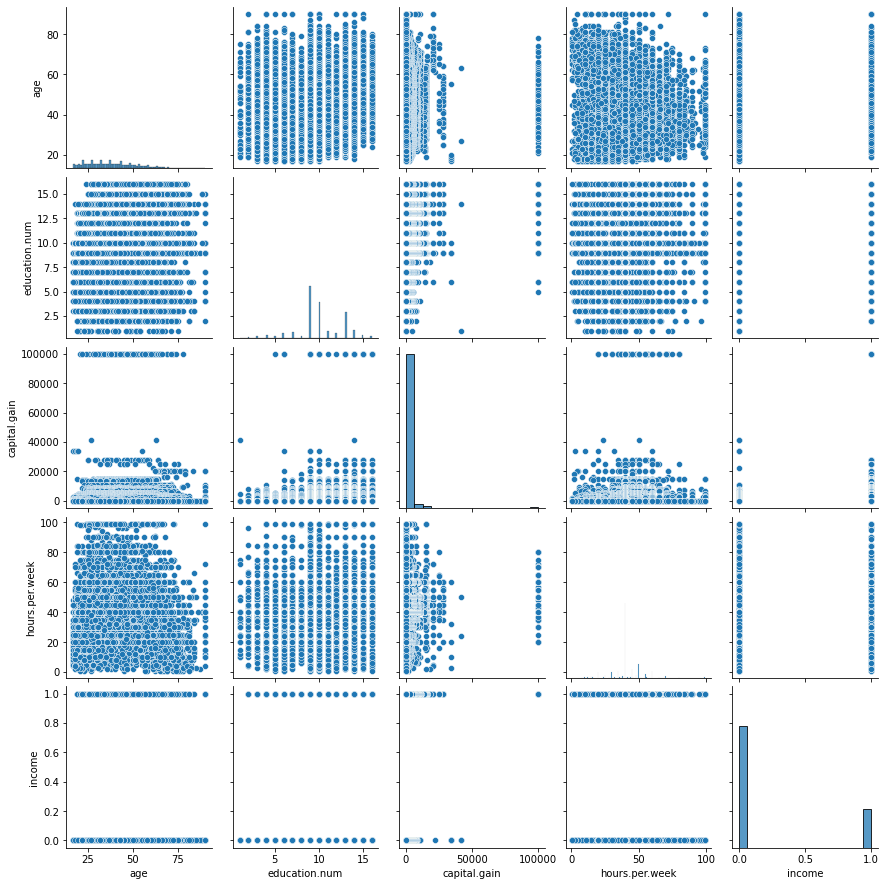

In [40]:
sns.pairplot(dataset)

### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [12]:
X = dataset.iloc[:, :-1].values
X


array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [13]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

### *Splitting Dataset into Train & Test*

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [44]:
print(X_train)
len(X_train)

[[  55    3    0   40]
 [  42    9    0   40]
 [  42    9    0   40]
 ...
 [  26    8    0   51]
 [  44   14    0   40]
 [  39    9 7298   40]]


24420

In [45]:
print(y_train)
len(y_train)

[0 0 0 ... 0 1 1]


24420

In [23]:
print(X_test)
len(X_test)


[[56  5  0 40]
 [19  9  0 25]
 [23 10  0 35]
 ...
 [44 10  0 55]
 [58  9  0 50]
 [55 10  0 45]]


8141

In [24]:
print(y_test)
len(y_test)

[0 0 0 ... 0 0 0]


8141

### *Feature Scaling*
### we scale our data to make all the features contribute equally to the result
###Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
###Transform - Transform method is transforming all the features using the respective mean and variance, 
###We want our test data to be a completely new and a surprise set for our model

In [46]:
## we transform data of only X i.e. input variables i.e. independent variables
## we do fit_transform on X_train and
## transform of X_test
# we import a standardScalar method form sklearn.preprocessing
#and we give it an alias of sc
# and then we use that method to do the fit transform and transform

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [47]:
X_train

array([[ 1.20264866, -2.76154633, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       ...,
       [-0.92200734, -0.81532491, -0.14509813,  0.85306386],
       [ 0.39674466,  1.52014079, -0.14509813, -0.03923011],
       [ 0.03042466, -0.42608063,  0.83219401, -0.03923011]])

In [48]:
X_test

array([[ 1.27591266, -1.98305776, -0.14509813, -0.03923011],
       [-1.43485534, -0.42608063, -0.14509813, -1.25599461],
       [-1.14179934, -0.03683634, -0.14509813, -0.44481828],
       ...,
       [ 0.39674466, -0.03683634, -0.14509813,  1.1775344 ],
       [ 1.42244067, -0.42608063, -0.14509813,  0.77194623],
       [ 1.20264866, -0.03683634, -0.14509813,  0.36635806]])

### *Finding the Best K-Value*

Text(0, 0.5, 'Mean Error')

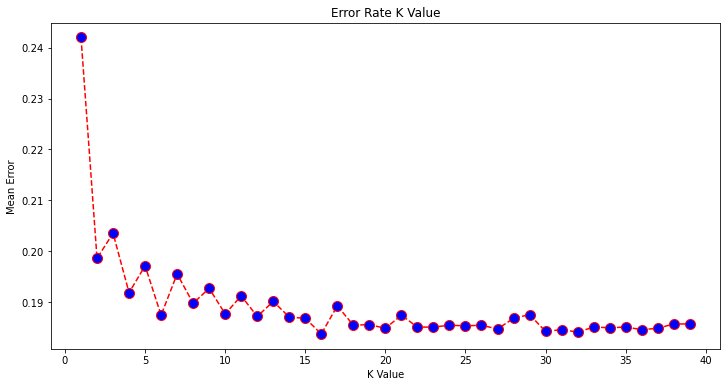

In [49]:
error = []                                    #creating an empty list called error

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### *Training*

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### *Predicting, wheather new customer with Age & Salary will Buy or Not*

In [52]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might have Salary above 50K")
else:
  print("Customer might not have Salary above 50K")

Enter New Employee's Age: 25
Enter New Employee's Education: 16
Enter New Employee's Captital Gain: 1
Enter New Employee's Hour's Per week: 48
[0]
Customer might not have Salary above 50K


### *Prediction for all Test Data*

In [53]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### *Evaluating Model - CONFUSION MATRIX*

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5941  252]
 [1365  583]]
Accuracy of the Model: 80.13757523645744%
